In [1]:
# !pip install missingno

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
train=pd.read_csv("C:/Users/yjp13/Desktop/titanic/train.csv")
test=pd.read_csv("C:/Users/yjp13/Desktop/titanic/test.csv")

In [4]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# train.head()

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
y_train=train["Survived"]

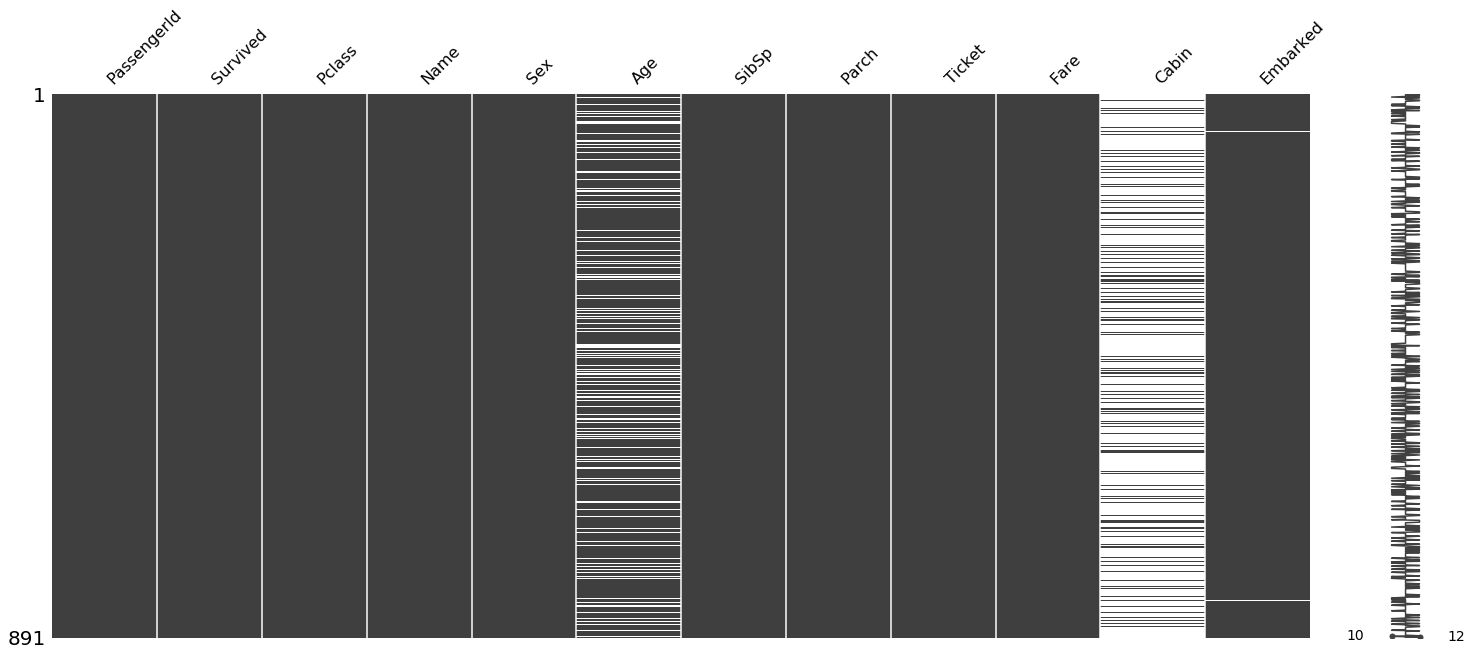

In [11]:
msno.matrix(train)

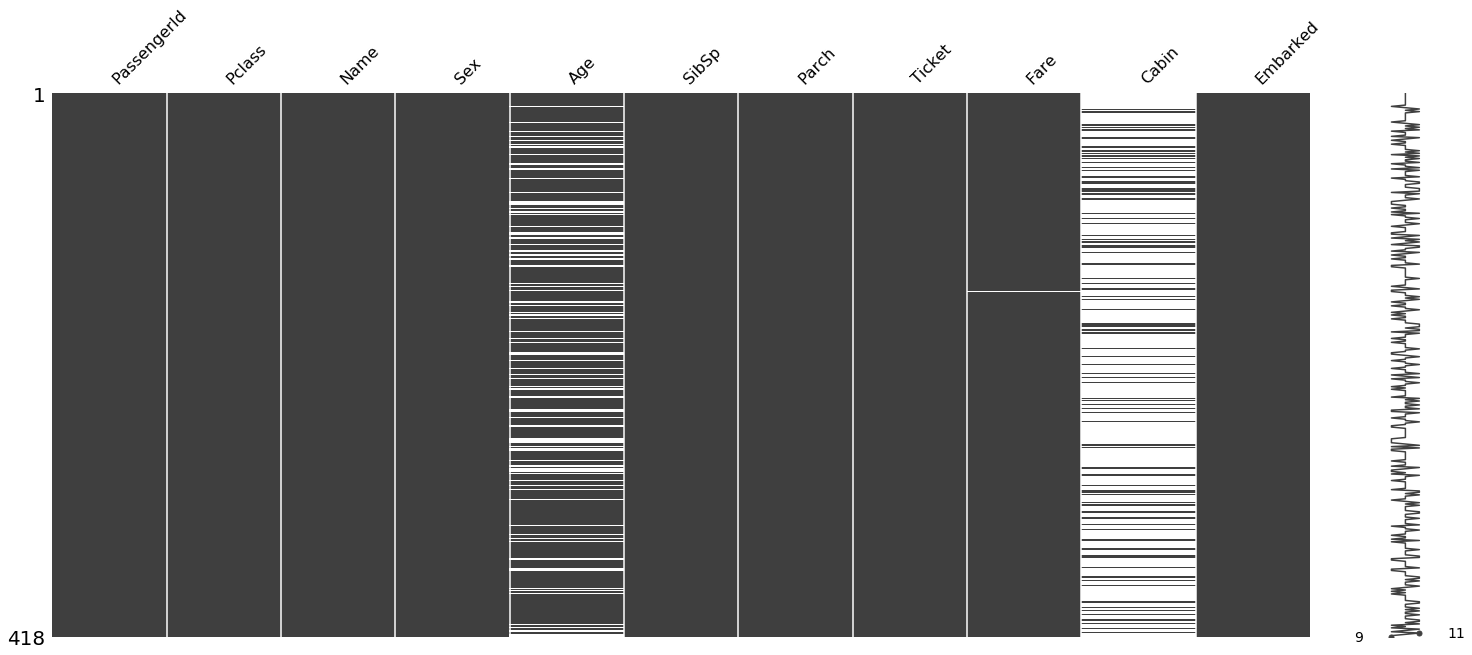

In [12]:
msno.matrix(test)

In [13]:
train["Age"]=train["Age"].fillna(train["Age"].mean())
test["Age"]=test["Age"].fillna(test["Age"].mean())

In [14]:
# del train["Cabin"]
# del train["Cabin"]

del_col=["Cabin"]
for c in del_col:
    del train[c]
    del test[c]

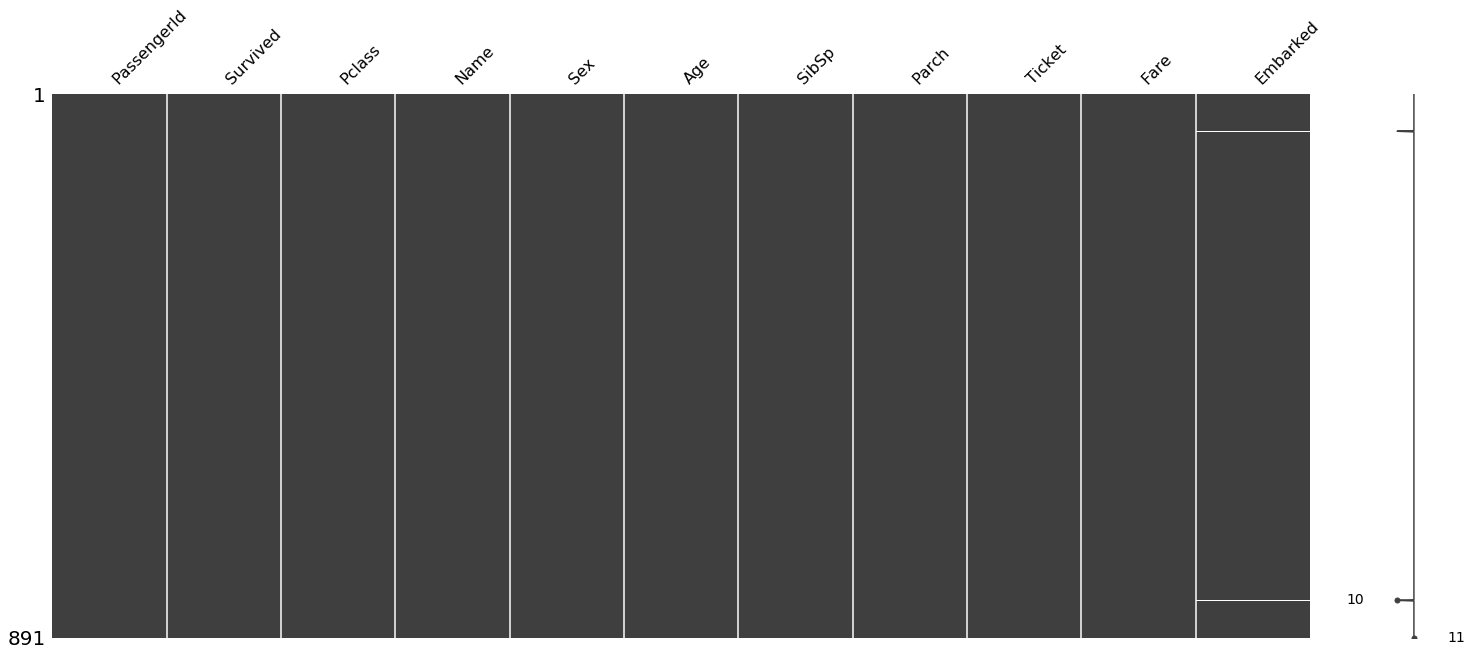

In [15]:
msno.matrix(train)

In [16]:
train["Embarked"]=train["Embarked"].fillna(train["Embarked"].mode()[0])

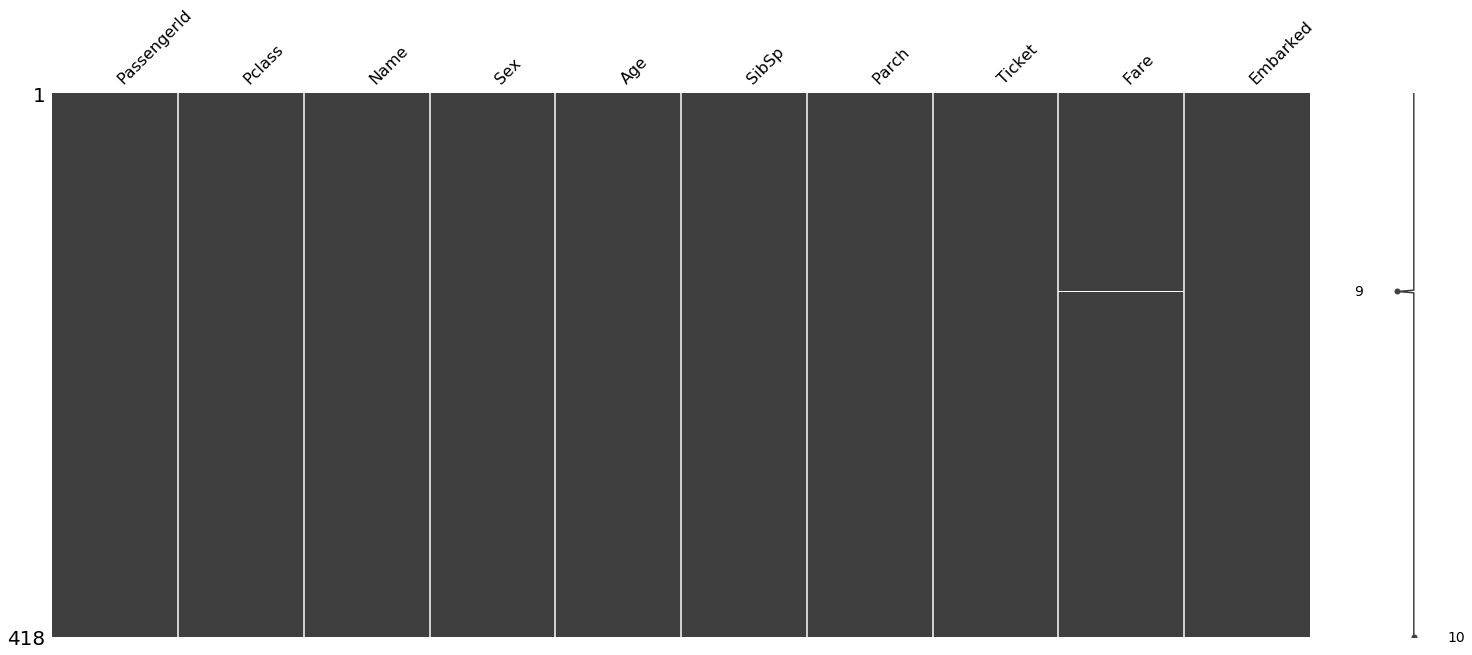

In [17]:
msno.matrix(test)

In [18]:
test["Fare"]=test["Fare"].fillna(test["Fare"].mean())

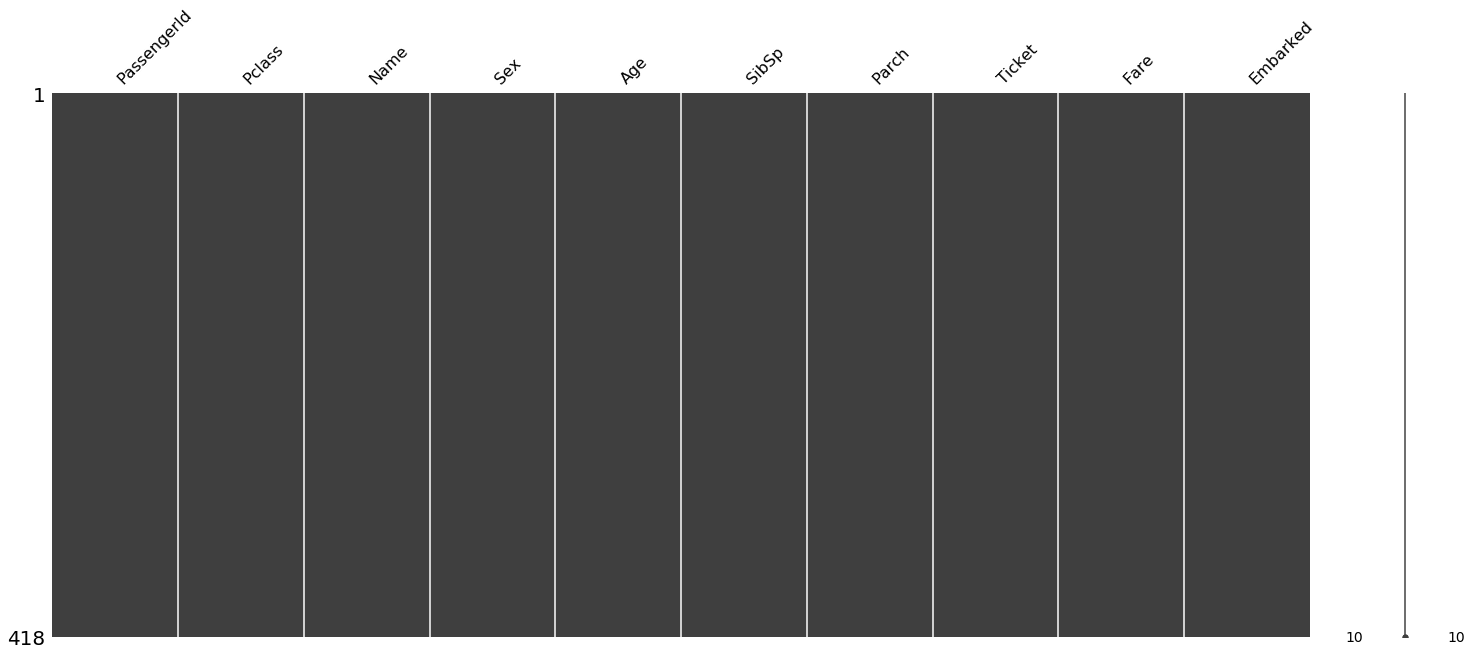

In [19]:
msno.matrix(test)

In [20]:
del_cols=["PassengerId","Name","Ticket"]
for c in del_cols:
    del train[c]
    del test[c]

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [22]:
train=pd.get_dummies(train)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [24]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [25]:
test=pd.get_dummies(test)

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass        418 non-null int64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Sex_female    418 non-null uint8
Sex_male      418 non-null uint8
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 18.4 KB


In [27]:
train.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [28]:
del train["Survived"]

In [29]:
# from sklearn.ensemble import RandomForestClassifier


In [30]:
# model=RandomForestClassifier(max_depth=5, random_state=2019)

In [31]:
# x_train, x_test, y_train, y_test=train_test_split(train, y_train, stratify=y_train, random_state=0)

In [32]:
# model.fit(x_train, y_train)

In [33]:
# print("훈련 세트 정확도 : {:.2f}".format(model.score(x_train, y_train)))
# print("테스트 세트 정확도 : {:.2f}".format(model.score(x_test, y_test)))

In [34]:
# print(train.shape)
# print(y_train.shape)

In [35]:
# y_pred=model.predict(test)

In [36]:
# sub=pd.read_csv("C:/Users/yjp13/Desktop/titanic/gender_submission.csv")

In [37]:
# sub.head()

In [38]:
# sub["Survived"]=y_pred

In [39]:
# sub.to_csv("Random_Forest_model.csv", index=False)

### Gradient Boosting 방법 적용

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
x_train, x_test, y_train, y_test=train_test_split(train, y_train, stratify=y_train,  random_state=0)

In [42]:
model1=GradientBoostingClassifier(random_state=0,max_depth=5)

In [43]:
model1.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [44]:
print("훈련 세트 정확도 : {:.2f}".format(model1.score(x_train, y_train)))
print("테스트 세트 정확도 : {:.2f}".format(model1.score(x_test, y_test)))

훈련 세트 정확도 : 0.97
테스트 세트 정확도 : 0.85


In [45]:
y_pred1=model1.predict(test)

In [46]:
sub1=pd.read_csv("C:/Users/yjp13/Desktop/titanic/gender_submission.csv")

In [47]:
sub1["Survived"]=y_pred1

In [48]:
sub1.to_csv("Gradient_Boosting_third_model.csv",index=False)

### SVM 적용


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
from sklearn.svm import SVC

In [51]:
svc=SVC()

In [52]:
svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
print("훈련 세트 정확도 : {:.2f}".format(svc.score(x_train, y_train)))
print("테스트 세트 정확도 : {:.2f}".format(svc.score(x_test, y_test)))

훈련 세트 정확도 : 0.90
테스트 세트 정확도 : 0.71
